* MNIST (Modified National Institute of Standards and Technology) dataset, which consists of 70,000 grayscale images of handwritten digits (0-9).
* Often considered the "Hello World" of Artificial Neural Networks (ANNs)
* image size - 28 X 28 pixels
* image color - Grayscale (single channel)


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

* Load and preprocess MNIST dataset

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5))])

In [ ]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transform, 
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transform, 
                                          download=True)

100.0%
100.0%
100.0%
100.0%


In [ ]:
train_loader = DataLoader(train_dataset, 
                          batch_size=64, 
                          shuffle=True)
test_loader = DataLoader(test_dataset, 
                         batch_size=64, 
                         shuffle=False)

* Function to display some images

In [8]:
def show_sample_images(dataset, num_of_images=5):
    fig, axes = plt.subplots(1, num_of_images, figsize=(10, 2))
    for i in range(num_of_images):
        image, label = dataset[i]
        axes[i].imshow(image.squeeze(), cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')
    plt.show()



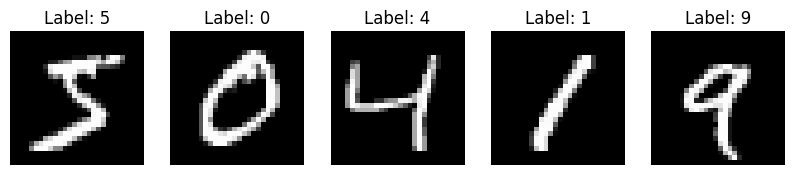

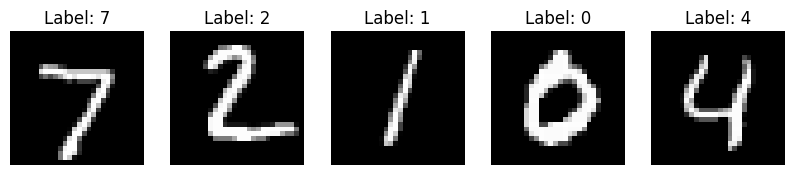

In [9]:
show_sample_images(train_dataset)
show_sample_images(test_dataset)

* Define the MLP model

In [10]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fu1 = nn.Linear(28*28, 128) # (in_features, out_features) Hidden layer with 128 neurons
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10) # output layer (10 clases, 0-9)

    def forward(self, x):
        x = x.view(-1, 28*28) # flatten the image
        x = self.fu1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

* Initialize model, loss, and optimizer

In [11]:
learing_rate = 0.001
epochs = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learing_rate)

* Training loop

In [ ]:
def train(model, train_loader, criterion, optimizer, epochs):
    model.train()
    loss_history = []
    for epoch in range(epochs):
        total_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        avg_loss = total_loss / len(train_loader)
        loss_history.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")

    return loss_history



In [25]:
# Function to plot loss history
def plot_loss(loss_history):
    plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o', linestyle='-', color='b')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss Over Epochs")
    plt.show()


* Evaluate model

In [21]:
def test(model, test_loader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")


Epoch [1/5], Loss: 0.0409
Epoch [2/5], Loss: 0.0349
Epoch [3/5], Loss: 0.0340
Epoch [4/5], Loss: 0.0327
Epoch [5/5], Loss: 0.0302


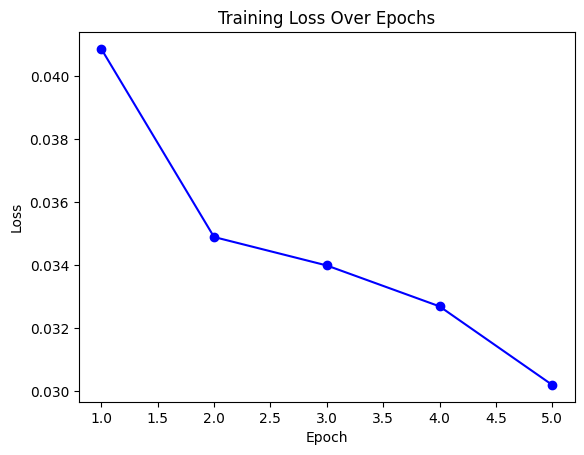

Test Accuracy: 97.50%


In [26]:
loss_history = train(model, train_loader, criterion, optimizer, epochs=5)
plot_loss(loss_history)
test(model, test_loader)

* Save the trained model

In [ ]:
torch.save(model.state_dict(), "mlp_mnist.pth")
print("Model saved successfully!")

Model saved successfully!


* Load the model and test on new images

In [ ]:
loaded_model = MLP().to(device)
loaded_model.load_state_dict(torch.load("mlp_mnist.pth"))
loaded_model.eval()
print("Model loaded successfully!")

Model loaded successfully!


* make predictions

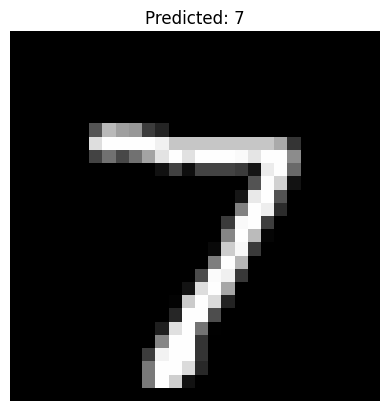

Actual: 7, Predicted: 7


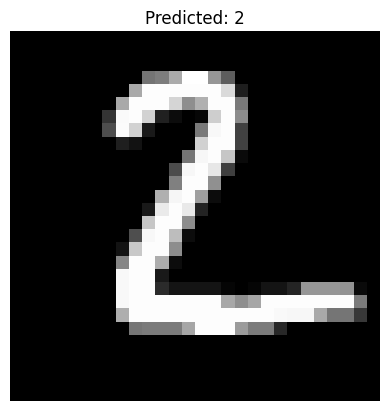

Actual: 2, Predicted: 2


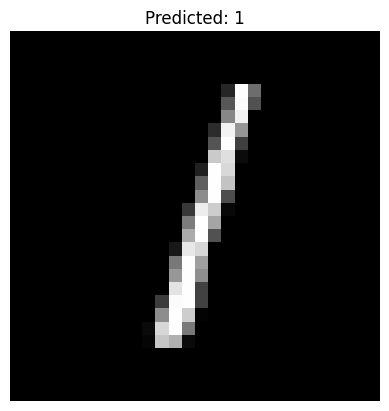

Actual: 1, Predicted: 1


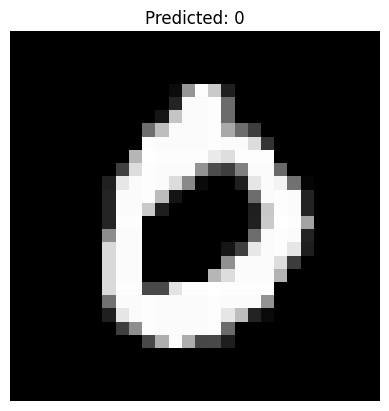

Actual: 0, Predicted: 0


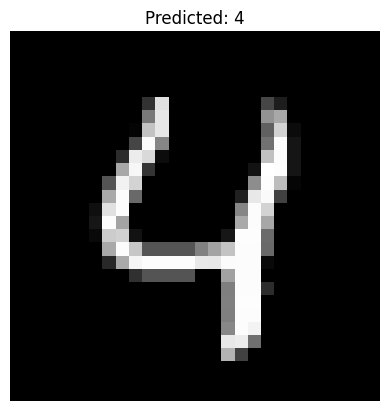

Actual: 4, Predicted: 4


In [ ]:
def predict(model, test_loader):
    model.eval()
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            for i in range(5):  # Display first 5 predictions
                plt.imshow(images[i].cpu().squeeze(), cmap='gray')
                plt.title(f"Predicted: {predicted[i].item()}")
                plt.axis('off')
                plt.show()
                print(f"Actual: {labels[i].item()}, Predicted: {predicted[i].item()}")
            break  # Only process first batch

# Run predictions on test images
predict(loaded_model, test_loader)